In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/datasets/twitter_dataset.csv")
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class
0,Source,5.810630e+17,-1.000000e+00,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1
1,Reply,5.810700e+17,5.810630e+17,@thatjohn Have they named the pilot?,germanwings-crash,query
2,Reply,5.810640e+17,5.810630e+17,@thatjohn @mschenk,germanwings-crash,comment
3,Source,5.813860e+17,-1.000000e+00,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1
4,Reply,5.815760e+17,5.813860e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment


In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/datasets/Extra_reddit_dataset.csv")
data1.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class
0,Source,63uefi,-1,Donald Trump's travel expenses in 10 weeks cos...,None,-1
1,Reply,dfx7l1a,63uefi,But he was from 2001-2009? I don't get what di...,None,comment
2,Reply,dfx88qg,63uefi,Cheney resigned as CEO of Halliburton on July ...,None,comment
3,Reply,dfx3i17,63uefi,[deleted],None,comment
4,Reply,dfx4yef,63uefi,"That is literally not a source, that is Niamh ...",None,comment


In [ ]:
data=pd.concat([data,data1])

In [ ]:
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment


In [ ]:
data["Class"].unique()

array(['-1', 'query', 'comment', 'deny', 'support'], dtype=object)

In [ ]:
data.size

54630

In [ ]:
data.shape

(9105, 6)

In [ ]:
import re

In [ ]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [ ]:
data['clean_text'] = data['Text'].apply(process_tweet)
data.head()


,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1,4u9525 robin names andreas lubitz as the copil...
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1,rt german media reporting andreaslubitz had a ...
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def stopword(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text_no_stp"] = data["clean_text"].apply(lambda text: stopword(text))
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1,4u9525 robin names andreas lubitz as the copil...,4u9525 robin names andreas lubitz copilot flig...
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot,named pilot
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,,
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1,rt german media reporting andreaslubitz had a ...,rt german media reporting andreaslubitz seriou...
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...


In [ ]:
from collections import Counter
cnt = Counter()
for text in data["text_no_stp"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('co', 1517),
 ('http', 1165),
 ('people', 805),
 ('https', 696),
 ('would', 639),
 ('like', 598),
 ('gt', 534),
 ('get', 446),
 ('one', 436),
 ('police', 410)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def frq(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["clean_text_new"] = data["text_no_stp"].apply(lambda text: frq(text))
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp,clean_text_new
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1,4u9525 robin names andreas lubitz as the copil...,4u9525 robin names andreas lubitz copilot flig...,4u9525 robin names andreas lubitz copilot flig...
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot,named pilot,named pilot
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,,,
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1,rt german media reporting andreaslubitz had a ...,rt german media reporting andreaslubitz seriou...,rt german media reporting andreaslubitz seriou...
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...


In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["clean_text_new"] = data["clean_text_new"].apply(lambda text: stem_words(text))
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp,clean_text_new
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1,4u9525 robin names andreas lubitz as the copil...,4u9525 robin names andreas lubitz copilot flig...,4u9525 robin name andrea lubitz copilot flight...
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot,named pilot,name pilot
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,,,
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1,rt german media reporting andreaslubitz had a ...,rt german media reporting andreaslubitz seriou...,rt german media report andreaslubitz seriou de...
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewal dred...


In [ ]:
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp,clean_text_new
0,Source,5.81063e+17,-1,#4U9525: Robin names Andreas Lubitz as the cop...,germanwings-crash,-1,4u9525 robin names andreas lubitz as the copil...,4u9525 robin names andreas lubitz copilot flig...,4u9525 robin name andrea lubitz copilot flight...
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot,named pilot,name pilot
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,,,
3,Source,5.81386e+17,-1,RT @khjelmgaard: German media reporting #Andre...,germanwings-crash,-1,rt german media reporting andreaslubitz had a ...,rt german media reporting andreaslubitz seriou...,rt german media report andreaslubitz seriou de...
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewal dred...


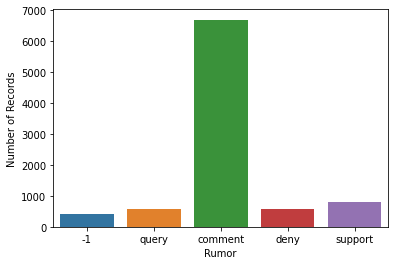

In [ ]:
sns.countplot(x='Class', data=data)
plt.xlabel('Rumor')
plt.ylabel('Number of Records')
plt.show()

In [ ]:
index_names = data[ data['Class'] == "-1" ].index
data.drop(index_names, inplace = True)
data=pd.DataFrame(data)


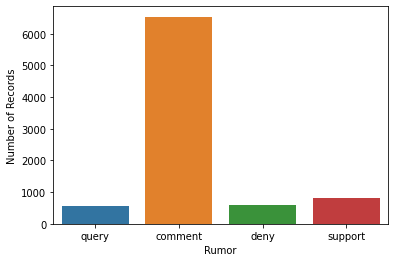

In [ ]:
sns.countplot(x='Class', data=data)
plt.xlabel('Rumor')
plt.ylabel('Number of Records')
plt.show()

In [ ]:
data['len_reviews'] = data['clean_text_new'].apply(len)

In [ ]:
data.head()

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp,clean_text_new,len_reviews
1,Reply,5.8107e+17,5.81063e+17,@thatjohn Have they named the pilot?,germanwings-crash,query,have they named the pilot,named pilot,name pilot,10
2,Reply,5.81064e+17,5.81063e+17,@thatjohn @mschenk,germanwings-crash,comment,,,,0
4,Reply,5.81576e+17,5.81386e+17,@tinkalee_12 @USATODAY @khjelmgaard #F4Phantom...,germanwings-crash,comment,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewall dre...,12 f4phantom crash 500mph hit concretewal dred...,68
5,Reply,5.82048e+17,5.81386e+17,@USATODAY @khjelmgaard ers a link to prove @An...,germanwings-crash,comment,ers a link to prove intentionally set out to k...,ers link prove intentionally set kill http co ...,er link prove intent set kill jdawh1xh9q,40
6,Reply,5.82206e+17,5.81386e+17,@USATODAY @khjelmgaard Sure #GermanWings CoPil...,germanwings-crash,comment,sure germanwings copilot andreaslubitz newmoti...,sure germanwings copilot andreaslubitz newmoti...,sure germanw copilot andreaslubitz newmot dead...,73


In [ ]:
data[data.index.duplicated()]

,Type,Msg_ID,Source_Msg_ID,Text,Topic,Class,clean_text,text_no_stp,clean_text_new,len_reviews
1,Reply,dfx7l1a,63uefi,But he was from 2001-2009? I don't get what di...,None,comment,but he was from 2001 2009 i don t get what dis...,2001 2009 get distinction making,2001 2009 distinct make,23
2,Reply,dfx88qg,63uefi,Cheney resigned as CEO of Halliburton on July ...,None,comment,cheney resigned as ceo of halliburton on july ...,cheney resigned ceo halliburton july 25 2000 v...,cheney resign ceo halliburton juli 25 2000 vic...,88
4,Reply,dfx4yef,63uefi,"That is literally not a source, that is Niamh ...",None,comment,that is literally not a source that is niamh m...,literally source niamh mcintyre opinion,liter sourc niamh mcintyr opinion,33
5,Reply,dfx8wwi,63uefi,"Nope, she cites actual statistics.",None,comment,nope she cites actual statistics,nope cites actual statistics,nope cite actual statist,24
6,Reply,dfx9bi9,63uefi,"Literally none, claiming security detail costs...",None,comment,literally none claiming security detail costs ...,literally none claiming security detail costs ...,liter none claim secur detail cost guy salari ...,66
...,...,...,...,...,...,...,...,...,...,...
2465,Reply,e3bf4jc,934q6t,No but there is plenty of red meat that is eas...,None,comment,no but there is plenty of red meat that is eas...,plenty red meat easily eaten raw even chimps a...,plenti red meat easili eaten raw even chimp ap...,64
2466,Reply,e3bg540,934q6t,"Go kill a deer... or, let's make it easy, a co...",None,comment,go kill a deer or let s make it easy a cow wit...,go kill deer let make easy cow bare hands eat ...,go kill deer let make easi cow bare hand eat t...,206
2467,Reply,e3c6wgj,934q6t,"Niacin is B3, that's not iodine.",None,comment,niacin is b3 that s not iodine,niacin b3 iodine,niacin b3 iodin,15
2468,Reply,e3cgyvc,934q6t,[Nascent iodine](https://www.globalhealingcent...,None,comment,nascent iodine https www globalhealingcenter c...,nascent iodine https www globalhealingcenter c...,nascent iodin www globalhealingcent com natur ...,73


In [ ]:
x=data["clean_text_new"]
y=data['Class']

In [ ]:
x.shape


(8502,)

In [ ]:
y.shape

(8502,)

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
oneE = OneHotEncoder(sparse=False)
def one_hot_encoder_1(y,inverse=False):
    if inverse:
        Y = oneE.inverse_transform(y)
    else:
        y = np.array(y)
        y = y.reshape(-1,1)
        Y = oneE.fit_transform(y)
    return Y,oneE

y,oneE = one_hot_encoder_1(y)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x)
X= tok.texts_to_sequences(x)
x=tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=50,padding='post')

In [ ]:
#from imblearn.under_sampling import NearMiss
#nm = NearMiss(random_state=42)
#x,y=nm.fit_sample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

x_train, y_train = oversample.fit_resample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train=pd.DataFrame(x_train)

In [ ]:
x_train.shape

(10108, 50)

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
y_train.shape

(10108, 4)

In [ ]:
print(x_train)

         0     1     2     3     4     5     6   ...  43  44  45  46  47  48  49
0       204  1444  7475     0     0     0     0  ...   0   0   0   0   0   0   0
1      1569   384   226   178  1338   848  7574  ...   0   0   0   0   0   0   0
2      1063   479    16    32    14   267  1584  ...   0   0   0   0   0   0   0
3      4181     0     0     0     0     0     0  ...   0   0   0   0   0   0   0
4      3920  3921  4906  1096    19   342  3731  ...   0   0   0   0   0   0   0
...     ...   ...   ...   ...   ...   ...   ...  ...  ..  ..  ..  ..  ..  ..  ..
10103     5   391   489  7829  2770  4697  7830  ...   0   0   0   0   0   0   0
10104     3   147    24  1020   276    76   174  ...   0   0   0   0   0   0   0
10105  1404   476    18  1785    76     0     0  ...   0   0   0   0   0   0   0
10106  3902  2602   397  1100  1844   121   447  ...   0   0   0   0   0   0   0
10107   482    85   572  3188     0     0     0  ...   0   0   0   0   0   0   0

[10108 rows x 50 columns]


In [ ]:
import keras as keras

In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tf.keras.preprocessing.sequence.pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K

from keras import initializers

In [ ]:
embedding_vecor_length = 32

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, embedding_vecor_length, input_length=max_len))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 373,303
Trainable params: 373,303
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test, y_test),batch_size=10,epochs=10)

Epoch 1/10
1011/1011 [==============================] - 90s 86ms/step - loss: 0.1885 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 2/10
1011/1011 [==============================] - 87s 86ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 3/10
1011/1011 [==============================] - 87s 86ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 4/10
1011/1011 [==============================] - 87s 87ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 5/10
1011/1011 [==============================] - 87s 86ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 6/10
1011/1011 [==============================] - 87s 86ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 - val_accuracy: 0.7500
Epoch 7/10
1011/1011 [==============================] - 87s 86ms/step - loss: 0.1875 - accuracy: 0.7500 - val_loss: 0.1875 -

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.constraints  import maxnorm

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

In [ ]:
class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        # mark emoticons as happy or sad
        X = X.str.replace(HAPPY_EMO, " happyemoticons ")
        X = X.str.replace(SAD_EMO, " sademoticons ")
        X = X.str.lower()
        return X

In [ ]:
grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),

])


In [ ]:
params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]

In [ ]:
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

ValueError: ignored